In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import itertools
import warnings

# 忽略警告
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 

matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
attachment1_file = 'D:\\AAALearn\\2024数学建模\\2024年中国研究生数学建模竞赛赛题\\C\\附件一（训练集）.xlsx'
sheet_names = ['材料1', '材料2', '材料3', '材料4']

data = pd.DataFrame()

for sheet in sheet_names:
    df = pd.read_excel(attachment1_file, sheet_name=sheet, usecols=[0, 1, 2, 3])
    df['磁芯材料'] = sheet
    data = pd.concat([data, df], ignore_index=True)


In [ ]:
rename_dict = {
    '温度，oC': '温度',
    '频率，Hz': '频率',
    '磁芯损耗，w/m3': '磁芯损耗',
    '励磁波形': '励磁波形',
    '磁芯材料': '磁芯材料'
}

# 重命名列名
data.rename(columns=rename_dict, inplace=True)

In [ ]:
# 转换数据类型
data['励磁波形'] = data['励磁波形'].astype('category')
data['磁芯材料'] = data['磁芯材料'].astype('category')

In [ ]:
data['励磁波形'] = data['励磁波形'].astype(str)
data['磁芯材料'] = data['磁芯材料'].astype(str)

In [ ]:
# 3. 独热编码，使用 `drop_first=True` 以避免多重共线性
data_encoded = pd.get_dummies(data, columns=['励磁波形', '磁芯材料'], drop_first=True)

# 查看编码后的数据
print("\n独热编码后的数据预览：")
print(data_encoded.head())

In [28]:
data_encoded=pd.read_csv('data_encoded.csv')

In [36]:
data = train_data.iloc[:, :5]

In [37]:
data

,温度,频率,磁芯损耗,励磁波形,磁芯材料
0,25,50030,1997.955250,正弦波,材料1
1,25,50020,2427.749830,正弦波,材料1
2,25,50020,3332.725760,正弦波,材料1
3,25,50020,4502.908007,正弦波,材料1
4,25,50030,6063.023248,正弦波,材料1
...,...,...,...,...,...
12395,90,199190,20604.900210,梯形波,材料4
12396,90,199190,26504.284280,梯形波,材料4
12397,90,199190,46232.491530,梯形波,材料4
12398,90,199190,61458.085900,梯形波,材料4


In [42]:
# 方差分析（ANOVA）

# 温度与励磁波形的方差分析
formula = '磁芯损耗 ~ C(温度) + C(励磁波形) + C(温度):C(励磁波形)'
model = smf.ols(formula, data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print('\n温度与励磁波形的方差分析结果：')
print(anova_table)

# 温度与磁芯材料的方差分析
formula = '磁芯损耗 ~ C(温度) + C(磁芯材料) + C(温度):C(磁芯材料)'
model = smf.ols(formula, data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print('\n温度与磁芯材料的方差分析结果：')
print(anova_table)

# 励磁波形与磁芯材料的方差分析
formula = '磁芯损耗 ~ C(励磁波形) + C(磁芯材料) + C(励磁波形):C(磁芯材料)'
model = smf.ols(formula, data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print('\n励磁波形与磁芯材料的方差分析结果：')
print(anova_table)



温度与励磁波形的方差分析结果：
                     sum_sq       df           F         PR(>F)
C(温度)          9.084358e+12      3.0   22.466844   1.679797e-14
C(励磁波形)        7.677357e+13      2.0  284.807116  1.172941e-121
C(温度):C(励磁波形)  2.036619e+12      6.0    2.518417   1.946509e-02
Residual       1.669676e+15  12388.0         NaN            NaN

温度与磁芯材料的方差分析结果：
                     sum_sq       df          F        PR(>F)
C(温度)          7.125553e+12      3.0  17.232585  3.658539e-11
C(磁芯材料)        4.074941e+13      3.0  98.549228  4.886014e-63
C(温度):C(磁芯材料)  8.374721e+11      9.0   0.675120  7.322576e-01
Residual       1.706899e+15  12384.0        NaN           NaN

励磁波形与磁芯材料的方差分析结果：
                       sum_sq       df           F         PR(>F)
C(励磁波形)          7.697475e+13      2.0  293.223002  3.777832e-125
C(磁芯材料)          4.290939e+13      3.0  108.970982   1.222128e-69
C(励磁波形):C(磁芯材料)  1.188392e+13      6.0   15.089962   2.720745e-17
Residual         1.626003e+15  12388.0         NaN   

In [4]:
training_file = 'D:\\AAALearn\\2024数学建模\\2024年中国研究生数学建模竞赛赛题\\C\\附件一（训练集）.xlsx'

sheets = ['材料1', '材料2', '材料3', '材料4']

train_dfs = []

for idx, sheet in enumerate(sheets):
    df = pd.read_excel(training_file, sheet_name=sheet)
    df['磁芯材料'] = f'材料{idx+1}'  
    train_dfs.append(df)

train_data = pd.concat(train_dfs, ignore_index=True)

print("训练集数据总览：")
print(train_data.head())

训练集数据总览：
   温度，oC  频率，Hz    磁芯损耗，w/m3 励磁波形  0（磁通密度B，T）         1         2         3  \
0     25  50030  1997.955250  正弦波    0.000213  0.000389  0.000566  0.000743   
1     25  50020  2427.749830  正弦波   -0.000551 -0.000358 -0.000165  0.000028   
2     25  50020  3332.725760  正弦波   -0.003780 -0.003564 -0.003349 -0.003134   
3     25  50020  4502.908007  正弦波   -0.000511 -0.000267 -0.000023  0.000222   
4     25  50030  6063.023248  正弦波    0.000458  0.000732  0.001007  0.001281   

          4         5  ...      1015      1016      1017      1018      1019  \
0  0.000919  0.001096  ... -0.001374 -0.001198 -0.001022 -0.000846 -0.000669   
1  0.000221  0.000413  ... -0.002284 -0.002091 -0.001899 -0.001707 -0.001515   
2 -0.002919 -0.002704  ... -0.005713 -0.005499 -0.005285 -0.005070 -0.004855   
3  0.000466  0.000711  ... -0.002707 -0.002463 -0.002220 -0.001976 -0.001732   
4  0.001555  0.001830  ... -0.002016 -0.001741 -0.001466 -0.001192 -0.000917   

       1020      1021      1022    

In [6]:
#train_data.to_csv('data_C3.csv',index=None)

In [13]:
train_data=pd.read_csv('data_C3.csv')

In [14]:
rename_dict = {
    '温度，oC': '温度',
    '频率，Hz': '频率',
    '磁芯损耗，w/m3': '磁芯损耗',
    '励磁波形': '励磁波形',
    '磁芯材料': '磁芯材料'
}
train_data.rename(columns=rename_dict, inplace=True)

In [15]:
print("\n提取统计特征后的训练集数据总览：")
print(train_data.head())


提取统计特征后的训练集数据总览：
   温度     频率         磁芯损耗 励磁波形  0（磁通密度B，T）         1         2         3  \
0  25  50030  1997.955250  正弦波    0.000213  0.000389  0.000566  0.000743   
1  25  50020  2427.749830  正弦波   -0.000551 -0.000358 -0.000165  0.000028   
2  25  50020  3332.725760  正弦波   -0.003780 -0.003564 -0.003349 -0.003134   
3  25  50020  4502.908007  正弦波   -0.000511 -0.000267 -0.000023  0.000222   
4  25  50030  6063.023248  正弦波    0.000458  0.000732  0.001007  0.001281   

          4         5  ...      1015      1016      1017      1018      1019  \
0  0.000919  0.001096  ... -0.001374 -0.001198 -0.001022 -0.000846 -0.000669   
1  0.000221  0.000413  ... -0.002284 -0.002091 -0.001899 -0.001707 -0.001515   
2 -0.002919 -0.002704  ... -0.005713 -0.005499 -0.005285 -0.005070 -0.004855   
3  0.000466  0.000711  ... -0.002707 -0.002463 -0.002220 -0.001976 -0.001732   
4  0.001555  0.001830  ... -0.002016 -0.001741 -0.001466 -0.001192 -0.000917   

       1020      1021      1022      1023  磁

In [16]:
flux_columns = train_data.columns[4:-1]

# 计算统计特征
train_data['flux_mean'] = train_data[flux_columns].mean(axis=1)
train_data['flux_std'] = train_data[flux_columns].std(axis=1)
train_data['flux_min'] = train_data[flux_columns].min(axis=1)
train_data['flux_max'] = train_data[flux_columns].max(axis=1)
train_data['flux_ptp'] = train_data['flux_max'] - train_data['flux_min']
train_data['flux_median'] = train_data[flux_columns].median(axis=1)
train_data['flux_skew'] = train_data[flux_columns].skew(axis=1)
train_data['flux_kurtosis'] = train_data[flux_columns].kurtosis(axis=1)
train_data['flux_rms'] = np.sqrt(np.mean(train_data[flux_columns]**2, axis=1))  # 均方根值

train_data = train_data.drop(columns=flux_columns)

print("\n提取统计特征后的训练集数据总览：")
print(train_data.head())



提取统计特征后的训练集数据总览：
   温度     频率         磁芯损耗 励磁波形 磁芯材料     flux_mean  flux_std  flux_min  \
0  25  50030  1997.955250  正弦波  材料1 -4.003908e-11  0.020410 -0.028840   
1  25  50020  2427.749830  正弦波  材料1 -2.539062e-11  0.022234 -0.031427   
2  25  50020  3332.725760  正弦波  材料1 -9.765699e-13  0.025119 -0.035513   
3  25  50020  4502.908007  正弦波  材料1 -5.859375e-11  0.028277 -0.040025   
4  25  50030  6063.023248  正弦波  材料1  4.101562e-11  0.031828 -0.045085   

   flux_max  flux_ptp  flux_median  flux_skew  flux_kurtosis  flux_rms  
0  0.028849  0.057689     0.000013  -0.000628      -1.499370  0.020400  
1  0.031419  0.062846     0.000024  -0.001224      -1.499348  0.022223  
2  0.035535  0.071047     0.000016  -0.000495      -1.497841  0.025107  
3  0.040015  0.080041     0.000037  -0.001533      -1.496349  0.028263  
4  0.045028  0.090113     0.000060  -0.002512      -1.496577  0.031812  


In [19]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 

matplotlib.rcParams['axes.unicode_minus'] = False

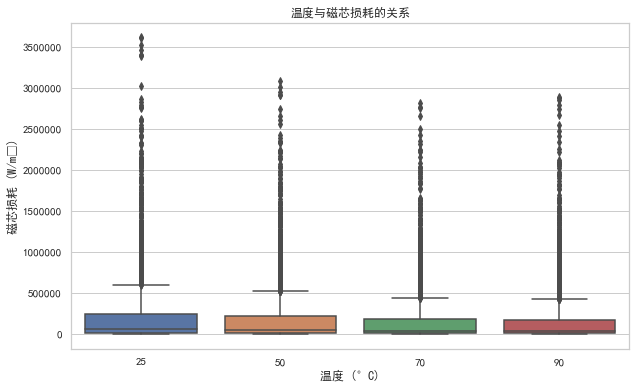

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='温度', y='磁芯损耗', data=train_data)
plt.title('温度与磁芯损耗的关系')
plt.xlabel('温度 (°C)')
plt.ylabel('磁芯损耗 (W/m³)')
plt.show()


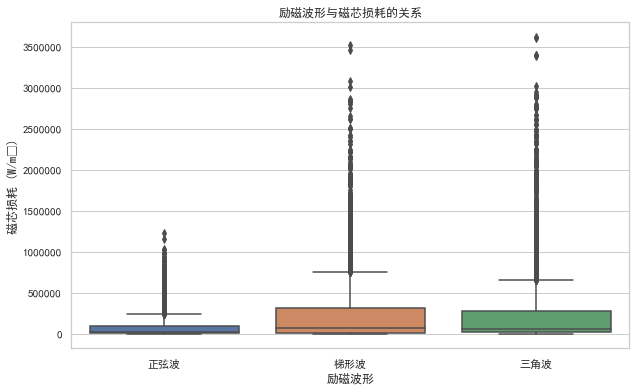

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='励磁波形', y='磁芯损耗', data=train_data)
plt.title('励磁波形与磁芯损耗的关系')
plt.xlabel('励磁波形')
plt.ylabel('磁芯损耗 (W/m³)')
plt.show()


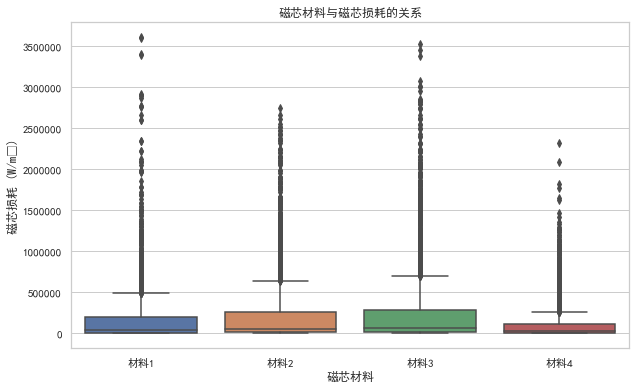

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='磁芯材料', y='磁芯损耗', data=train_data)
plt.title('磁芯材料与磁芯损耗的关系')
plt.xlabel('磁芯材料')
plt.ylabel('磁芯损耗 (W/m³)')
plt.show()


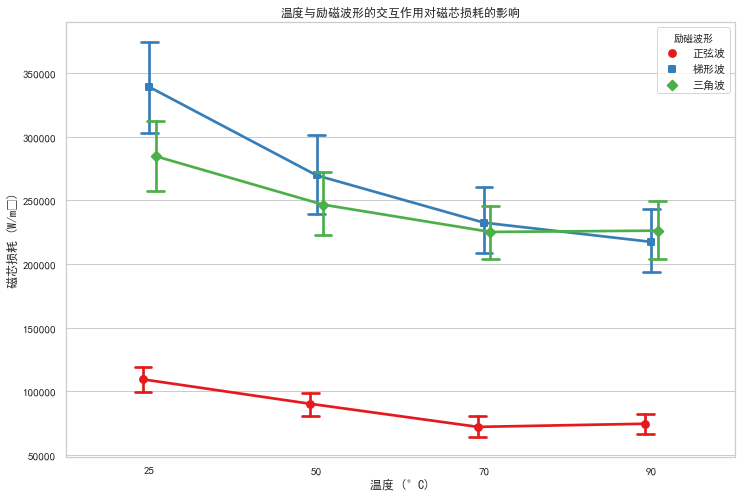

In [23]:
plt.figure(figsize=(12, 8))
sns.pointplot(x='温度', y='磁芯损耗', hue='励磁波形', data=train_data, palette='Set1', dodge=True, markers=["o", "s", "D"], capsize=.1)
plt.title('温度与励磁波形的交互作用对磁芯损耗的影响')
plt.xlabel('温度 (°C)')
plt.ylabel('磁芯损耗 (W/m³)')
plt.legend(title='励磁波形')
plt.show()


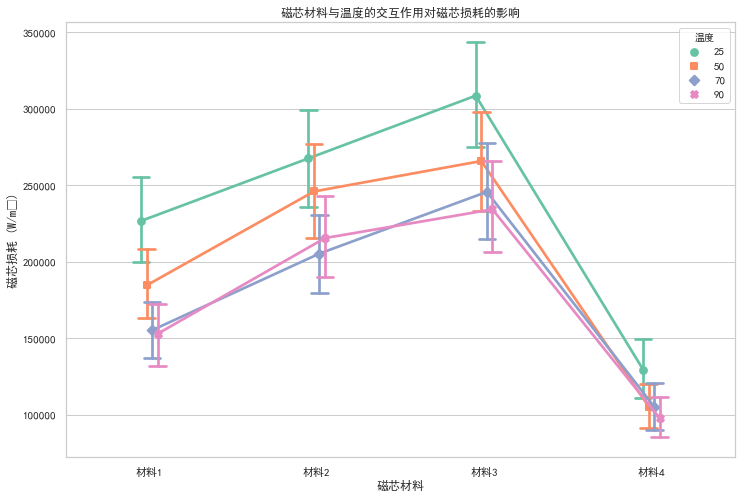

In [26]:
plt.figure(figsize=(12, 8))
sns.pointplot(x='磁芯材料', y='磁芯损耗', hue='温度', data=train_data, palette='Set2', dodge=True, markers=["o", "s", "D", "X"], capsize=.1)
plt.title('磁芯材料与温度的交互作用对磁芯损耗的影响')
plt.xlabel('磁芯材料')
plt.ylabel('磁芯损耗 (W/m³)')
plt.legend(title='温度')
plt.show()


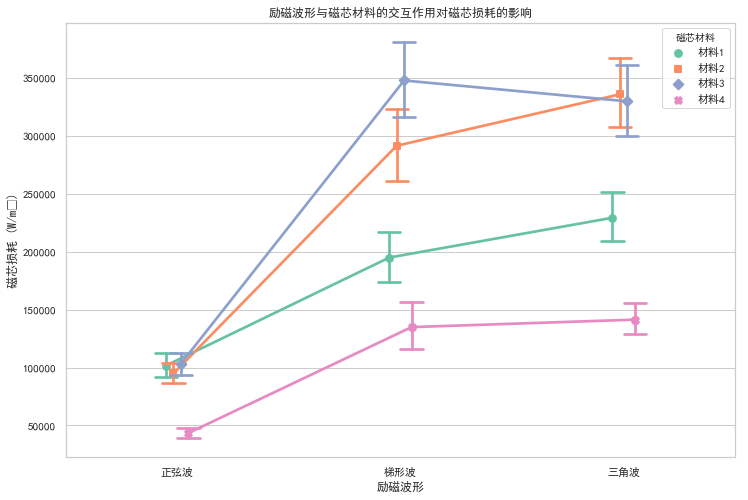

In [24]:
plt.figure(figsize=(12, 8))
sns.pointplot(x='励磁波形', y='磁芯损耗', hue='磁芯材料', data=train_data, palette='Set2', dodge=True, markers=["o", "s", "D", "X"], capsize=.1)
plt.title('励磁波形与磁芯材料的交互作用对磁芯损耗的影响')
plt.xlabel('励磁波形')
plt.ylabel('磁芯损耗 (W/m³)')
plt.legend(title='磁芯材料')
plt.show()


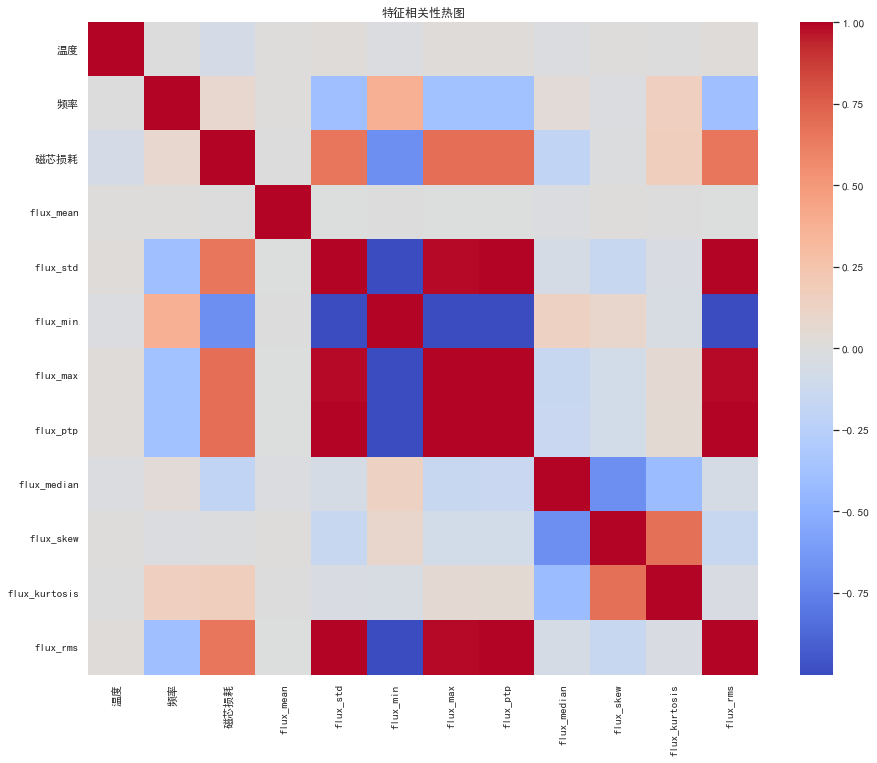

In [25]:
plt.figure(figsize=(15, 12))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('特征相关性热图')
plt.show()
